In [22]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree, complete, leaders
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("iris_data.csv" )

In [18]:
df.columns =['sepal_length','sepl_width','petal_length','petal_width','species']

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
sepal_length    149 non-null float64
sepl_width      149 non-null float64
petal_length    149 non-null float64
petal_width     149 non-null float64
species         149 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [71]:
scaler_estimator = StandardScaler()

In [44]:
df_train = df.iloc[:,0:4]

In [45]:
df_train.head()

,sepal_length,sepl_width,petal_length,petal_width
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4


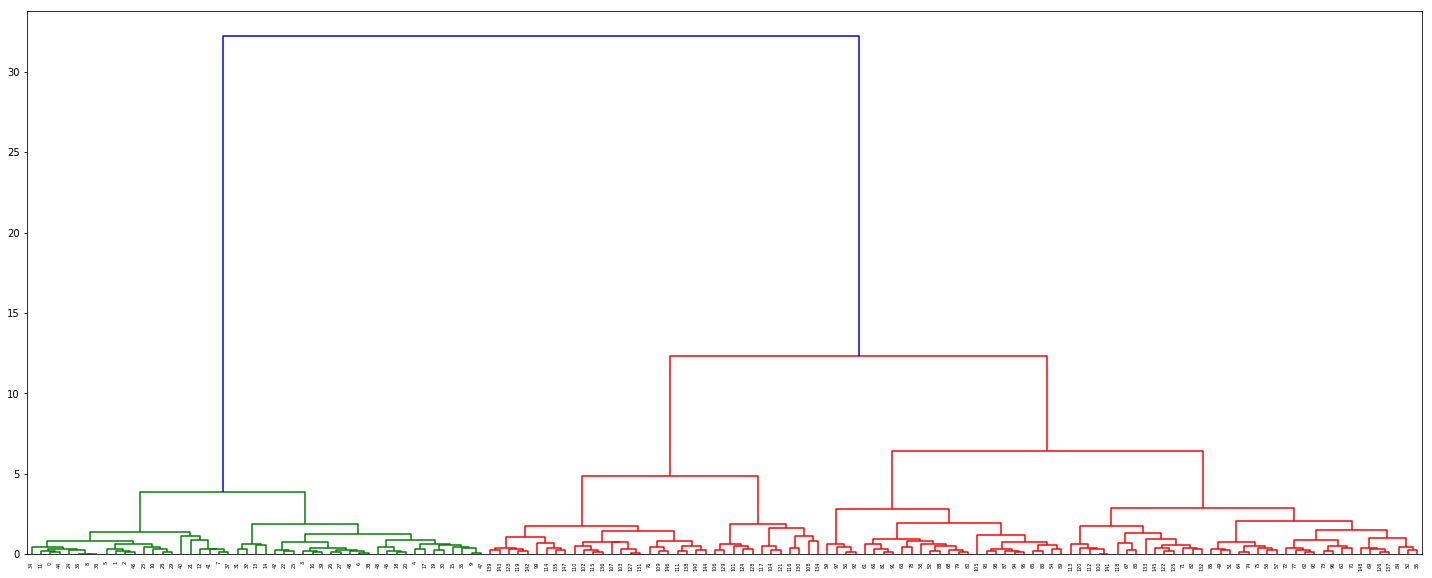

In [34]:
Z = linkage(df_train, 'ward', )
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

In [46]:
clusters = cut_tree(Z,n_clusters=[5])

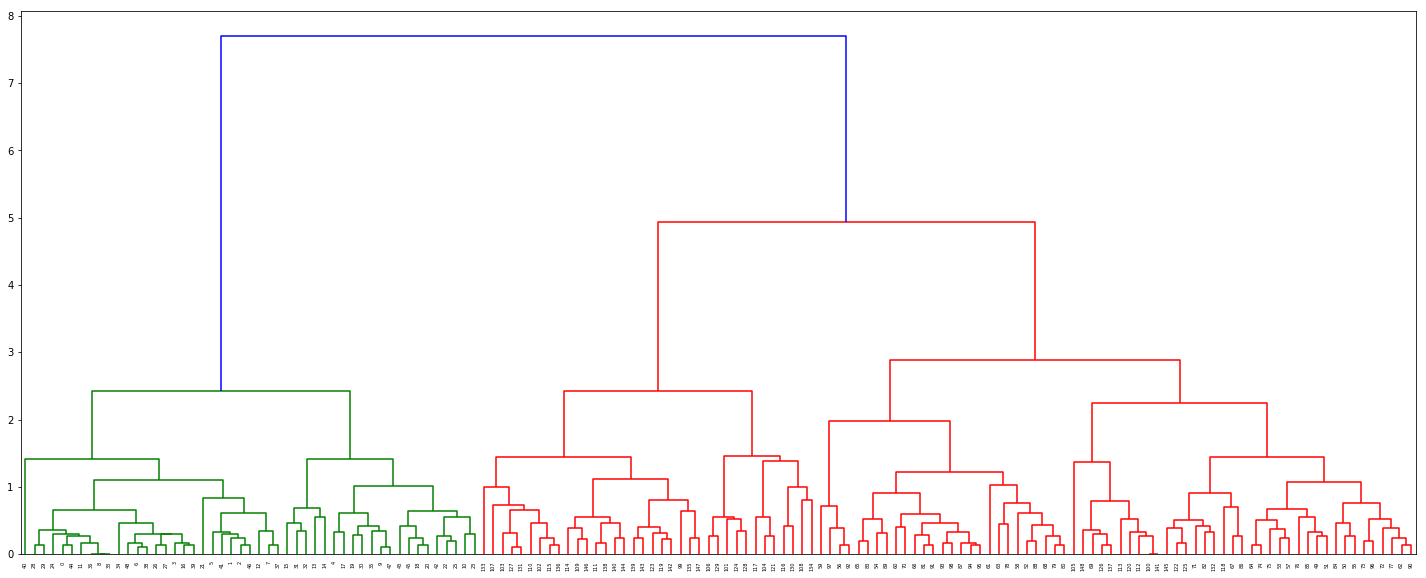

In [51]:
Z_complete = linkage(df_train, 'complete')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z_complete)

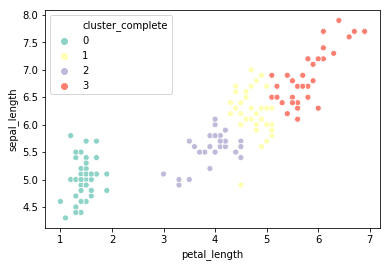

In [53]:
vector = cut_tree(Z_complete,4)
df_train["cluster_complete"] = vector
sns.scatterplot(x="petal_length", y="sepal_length",data=df_train, hue="cluster_complete",palette=sns.color_palette("Set3", 4))

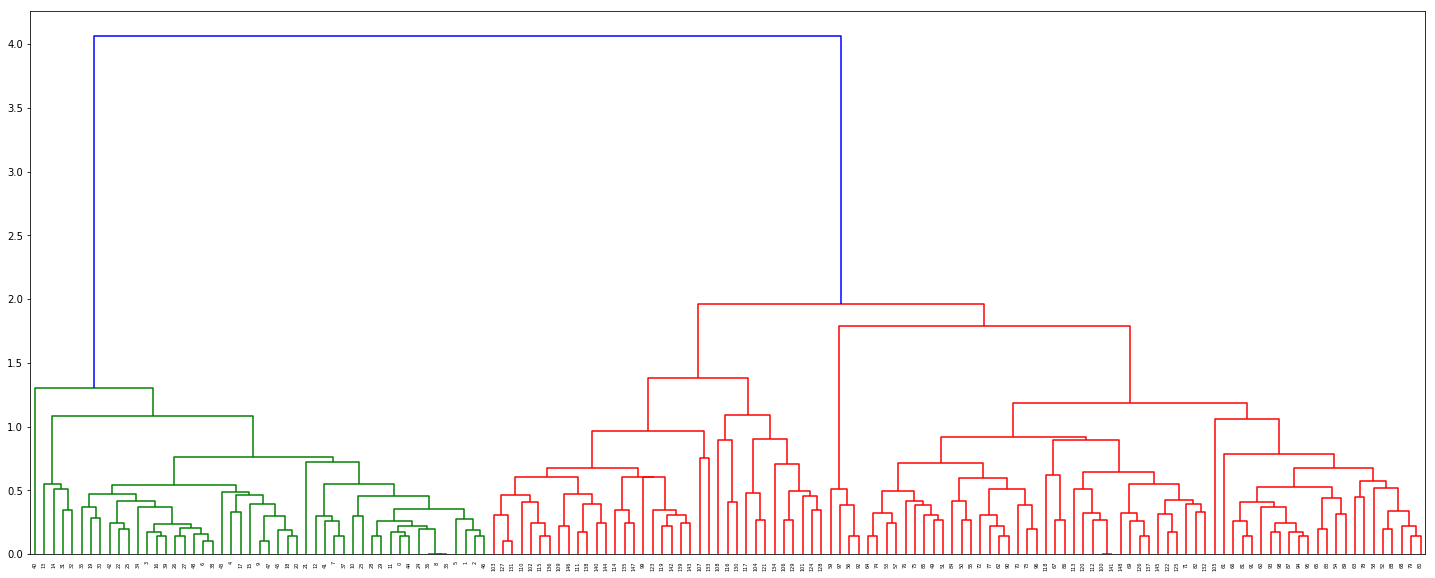

In [42]:
Z_avg = linkage(df_train, 'average')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z_avg)

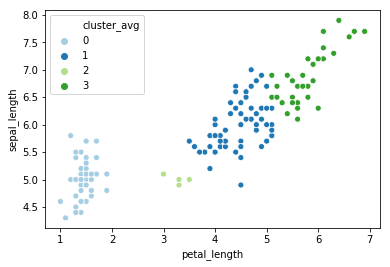

In [50]:
vector = cut_tree(Z_avg,4)
df_train["cluster_avg"] = vector
sns.scatterplot(x="petal_length", y="sepal_length",data=df_train, hue="cluster_avg",palette=sns.color_palette("Paired", 4))

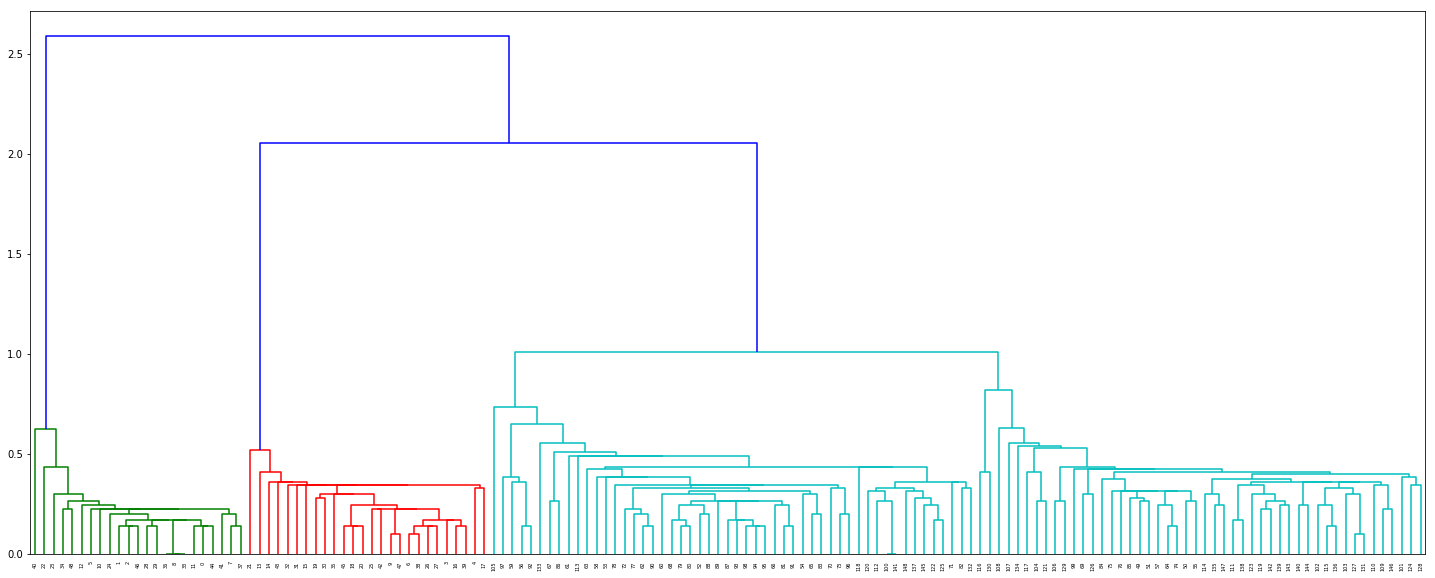

In [83]:
Z_single = linkage(df_train, 'single')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z_single)

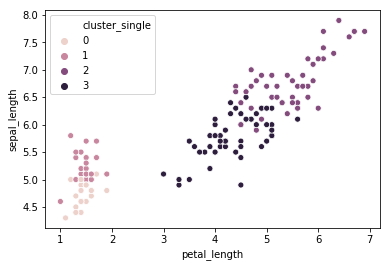

In [88]:
vector = cut_tree(Z_single,4)
df_train["cluster_single"] = vector
sns.scatterplot(x="petal_length", y="sepal_length",data=df_train, hue="cluster_single")

In [63]:
from sklearn.cluster import KMeans

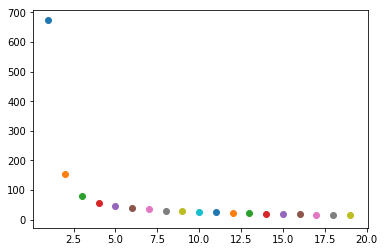

In [70]:
for i in range(1,20):
    kmeans_estimator = KMeans(n_clusters=i, max_iter = 100)
    kmeans_estimator.fit(df_train)
    plt.scatter(i, kmeans_estimator.inertia_)
plt.show()

df_scale = scaler_estimator.fit_transform(df_train)
for i in range(1,20):
    kmeans_estimator = KMeans(n_clusters=i, max_iter = 100)
    kmeans_estimator.fit(df_scale)
    plt.scatter(i, kmeans_estimator.inertia_)
plt.show()

In [78]:
kmeans_estimator = KMeans(n_clusters=4, max_iter = 300)
kmeans_estimator.fit(df_scale)
df_train["cluster"] =  kmeans_estimator.labels_

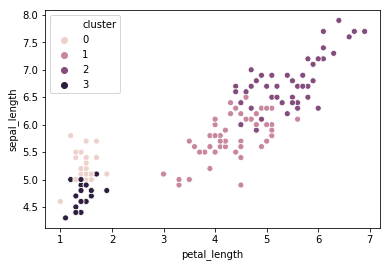

In [82]:
import seaborn as sns
sns.scatterplot(x="petal_length", y="sepal_length",data=df_train, hue="cluster")

# TSNE Ejemplo

In [6]:
from sklearn.manifold import TSNE

In [36]:
tsne_estimator = TSNE(learning_rate=100, perplexity=25, n_components=2)
Y = tsne_estimator.fit_transform(df_train)

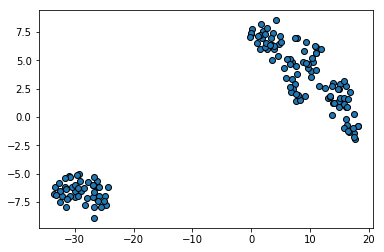

In [37]:
#X, color = datasets.samples_generator.make_s_curve(n_points, random_state=0)
plt.scatter(Y[:, 0], Y[:, 1], cmap=plt.cm.Spectral, edgecolors="black")
plt.show()

In [38]:
df["Y1"]= Y[:, 0] 
df["Y2"]= Y[:, 1]

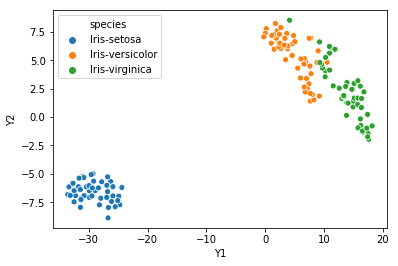

In [40]:
sns.scatterplot("Y1","Y2",data= df, hue="species" )